In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model




In [3]:
def extract_features(data):
    # Add feature extraction logic here
    # Example: Extract statistical features (mean, standard deviation, etc.)
    features = np.mean(data, axis=1)  # Example: Mean value of each data sample
    return features



In [4]:
# Function for real-time monitoring and anomaly visualization
def visualize_anomalies(data, reconstruction_error, threshold):
    # Visualize data and anomalies
    plt.figure(figsize=(10, 6))
    plt.plot(reconstruction_error, label='Reconstruction Error', color='blue')
    plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
    plt.xlabel('Sample Index')
    plt.ylabel('Reconstruction Error')
    plt.title('Anomaly Detection')
    plt.legend()
    plt.show()


In [5]:
# Generate synthetic data for demonstration
# Replace this with your actual dataset
#np.random.seed(42)
#X_train = np.random.normal(loc=0, scale=1, size=(1000, 10))

#X_train = np.loadtxt('creditcardfraud_normalised.csv', delimiter=',')
import pandas as pd

# Load data from CSV file excluding the header
data = pd.read_csv('creditcardfraud_normalised.csv', skiprows=1)

# Extract features from the loaded data
X_train = data.values
X_train


array([[9.78542e-01, 7.70067e-01, 8.40298e-01, ..., 3.13423e-01,
        1.05000e-04, 0.00000e+00],
       [9.35217e-01, 7.53118e-01, 8.68141e-01, ..., 3.11911e-01,
        1.47390e-02, 0.00000e+00],
       [9.41878e-01, 7.65304e-01, 8.68484e-01, ..., 3.14371e-01,
        4.80700e-03, 0.00000e+00],
       ...,
       [9.90905e-01, 7.64080e-01, 7.81102e-01, ..., 3.12585e-01,
        2.64200e-03, 0.00000e+00],
       [9.54209e-01, 7.72856e-01, 8.49587e-01, ..., 3.15245e-01,
        3.89000e-04, 0.00000e+00],
       [9.49232e-01, 7.65256e-01, 8.49601e-01, ..., 3.13401e-01,
        8.44600e-03, 0.00000e+00]])

In [7]:
                                                                  # Define input shape
input_shape = X_train.shape[1]


In [8]:


                                                                    # Define the architecture of the autoencoder
input_layer = Input(shape=(input_shape,))
encoded = Dense(64, activation='relu')(input_layer)                  # Encoding layer
decoded = Dense(input_shape, activation='sigmoid')(encoded)              # Decoding layer

In [9]:

                                                                  # Create autoencoder model
autoencoder = Model(input_layer, decoded)

                                                                # Compile autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

In [10]:
       
                                                               # Train the autoencoder using normal data samples
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32)

                                                        # Use the trained autoencoder to reconstruct data samples
reconstructed_data = autoencoder.predict(X_train)

                                                          # Extract features from reconstructed data
extracted_features = extract_features(reconstructed_data)
extracted_features

Epoch 1/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.0018
Epoch 2/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 7.1590e-05
Epoch 3/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 2.8810e-05
Epoch 4/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1.6771e-05
Epoch 5/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1.2968e-05
Epoch 6/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1.0437e-05
Epoch 7/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 9.2268e-06
Epoch 8/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 8.1656e-06
Epoch 9/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 7.7599e-06
Epoch 10/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 7.5386e-06
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


array([0.5104506 , 0.5022426 , 0.49499223, ..., 0.5109279 , 0.51722115,
       0.49562663], dtype=float32)

In [11]:
                                                             # Calculate reconstruction error for each data sample
reconstruction_error = np.mean(np.square(X_train - reconstructed_data), axis=1)
reconstruction_error

array([1.74055989e-06, 1.03524985e-05, 1.07116800e-05, ...,
       4.25699023e-06, 2.28102689e-05, 2.70581347e-06])

In [12]:
                               # Set a threshold for anomaly detection 
                                 #(e.g., based on reconstruction error percentiles)
threshold = np.percentile(reconstruction_error, 95)
threshold

2.040424869723233e-05

In [14]:
                                          # Detect anomalies based on reconstruction error exceeding the threshold
anomalies = X_train[reconstruction_error > threshold]
anomalies

array([[9.25621e-01, 7.58073e-01, 8.77619e-01, ..., 3.05086e-01,
        1.36200e-03, 0.00000e+00],
       [9.37925e-01, 7.51704e-01, 8.69304e-01, ..., 2.98222e-01,
        3.47100e-03, 0.00000e+00],
       [8.80569e-01, 7.20524e-01, 8.96376e-01, ..., 3.03864e-01,
        7.78500e-03, 0.00000e+00],
       ...,
       [7.45650e-01, 8.74755e-01, 6.90525e-01, ..., 3.38142e-01,
        3.84000e-04, 0.00000e+00],
       [7.56448e-01, 8.73531e-01, 6.66991e-01, ..., 3.29840e-01,
        3.00000e-05, 0.00000e+00],
       [9.54209e-01, 7.72856e-01, 8.49587e-01, ..., 3.15245e-01,
        3.89000e-04, 0.00000e+00]])

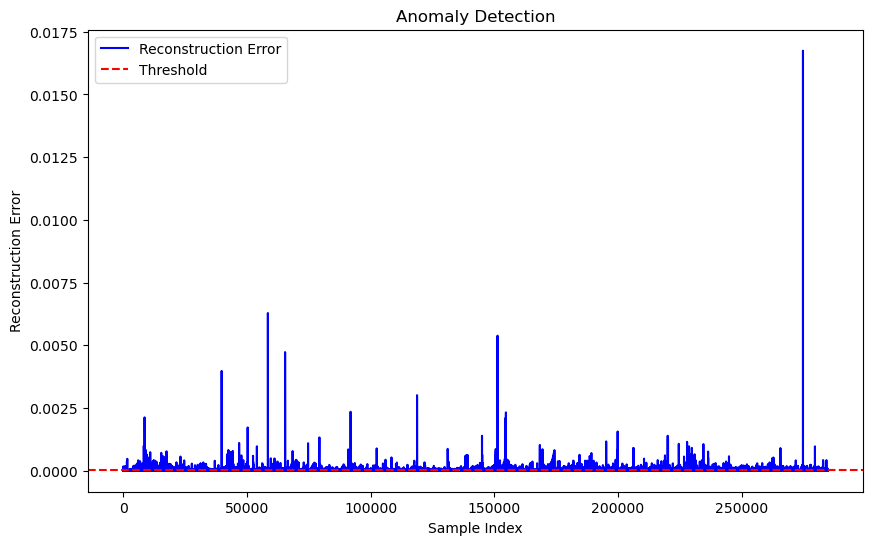

In [15]:

visualize_anomalies(X_train, reconstruction_error, threshold)
